In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Introduction

This short report considers some of the possible factors that may correlate with voting patterns in the UK referendum on June 24th 2016 to leave ( = 'Leave' in this report) or remain ( = 'Remain') in the European Union (EU). A complex, and controversial, subject matter invariably means that no single simple explanation underlies the result of the referendum and no one dataset will offer-up insight into the vote patterns. Here, I explore some tractable metrics that might play into the concluding vote to leave. These are:
* Disposable income by region (https://www.ons.gov.uk/economy/regionalaccounts/grossdisposablehouseholdincome/bulletins/regionalgrossdisposablehouseholdincomegdhi/2015
* Exposure to immigration (https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/internationalmigration/articles/migrationandthelabourmarketuk/2016)

# 2. Datasets

The datasets used in this narrative are taken from the UK Office of National Statistics (ONS) that is the largest independent UK producer of statistics and informs government decision-making (https://www.ons.gov.uk). The rationale for exploring gross disposable household income (GDHI) is that tighter household budgets, and less discretionary spending power, should lead to greater levels of discontentment that is frequently centred on government policy: Disgruntled voters will not respond to official encouragement to back the _status quo_. Levels of immigration or rather the exposure to immigrants was pushed into the campaign by the Leave side and (counterintuitively) by the Remain side. Is the exposure to immigrants more likely to encourage discontentment? How does it correspond with disposable income? It might lead to the reverse situation in that areas with greater exposure to immigrants are more likely to hold neutral or positive views on immigration. 

Age was cited in previous reactions to the vote as a key determinant of a person's likelihood to vote Leave. However, 'age' is not really a variable/factor - it's the catch-all that masks other processes and patterns in the same way that 'time' and 'space' are not acceptable variables for analysis in many fields of study. 'Age' suffers from considerable collinearity with other factors (e.g. rural -urban divide, disposable income, sentiments on national identify etc.) and is not considered here.

### 2.1 The final result of the vote

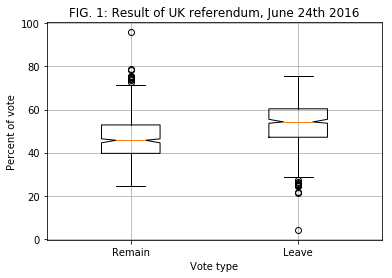

In [18]:
#Results of the UK referendum on leaving the European Union
result = pd.read_csv('C:\\Thinkful_project\\Brexit_data\\referendum.csv')

#------------------------------------------------------------------------#
#Figure 1:  The final result
#------------------------------------------------------------------------#

data = [result['Percent Remain'], result['Percent Leave']]

plt.boxplot(data,notch =True, bootstrap=9999, widths=0.35)
plt.grid()
plt.xlabel("Vote type")
plt.ylabel("Percent of vote")
plt.title("FIG. 1: Result of UK referendum, June 24th 2016")
plt.xticks([1, 2], ['Remain', 'Leave'])
plt.show()

In [19]:
#Total valid votes cast:
votes = sum(result.Remain + result.Leave)
per_remain = int(100/votes*sum(result.Remain))
per_leave = int(100-per_remain)

print("Mean votes to remain in the EU was {}% and to leave the EU was {}%".format(per_remain, per_leave))

Mean votes to remain in the EU was 48% and to leave the EU was 52%


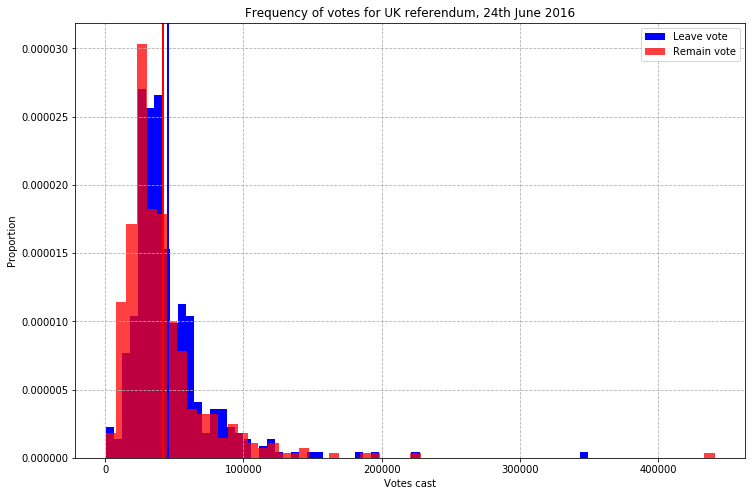

In [48]:
mean_l = sum(result.Leave/len(result.Leave))
mean_r = sum(result.Remain/len(result.Remain))

plt.figure(figsize=(12,8))
plt.hist(result.Leave, normed=True, color='blue', bins=60, label='Leave vote') 
plt.hist(result.Remain, normed=True, color='red', bins=60, alpha=.75, label='Remain vote')
plt.grid(linestyle='--')
plt.title('Frequency of votes for UK referendum, 24th June 2016')
plt.xlabel('Votes cast')
plt.ylabel('Proportion')
plt.legend(loc='upper right')
plt.axvline(mean_l, color='blue', linestyle='solid', linewidth=2)
plt.axvline(mean_r, color='red', linestyle='solid', linewidth=2)

plt.show()

### 2.2 Data preparation

In [28]:
#1) GROSS DISPOSABLE HOUSEHOLD INCOME from 2015
income = pd.read_csv('C:\\Thinkful_project\\Brexit_data\\income_2015.csv')#This dataset will not coerce into numeric values. 

income['Per head'] = income['Per head'].str.replace(',', '')
income['Per head'] = income['Per head'].astype(int)
#income.dtypes indicates that the numeric column is now int32 without a comma seperating values rather than a string.

#Calculate the difference from the UK average for the different regions and append a new column into the 'income' df. 
#Raw data contains a UK average and the values for the different regions: 

x =[]
for i in income['Per head']:
     y = income.iloc[0][1]
     x.append(i - y)

income['Difference from UK average'] = x
#-------------------------------------------------------------------------------------------------------------------------
#2) IMMIGRATION data from 2016
'''
Data from international immigration in the UK for 2016 as reported in April 2017. These data are measures of household 
composition and reflect the estimated number of people per household that identify with either being from the UK, the EU 
(excluding the UK), and non-EU (i.e. international such as Australian). The figures really reflect a density and are used 
here as a coarse proxy for exposure to immigrants within region.
''' 
immigration = pd.read_csv('C:\\Thinkful_project\\Brexit_data\\immigration.csv') 

# 3. Analytic questions

## 3.1 Which region voted most strongly to leave the EU?

The regional pattern can be broken done into different administrative units. The largest standard units are those of kingdoms (e.g. Scotland) and large regional areas (e.g. West Midlands). The smallest units are towns and cities that make up the. Hence there will be variability in sample size. 

In [29]:
print(len(result.Area))
print(result.Electorate.describe())

382
count    3.820000e+02
mean     1.217278e+05
std      9.706175e+04
min      1.799000e+03
25%      7.252375e+04
50%      9.642550e+04
75%      1.413798e+05
max      1.260955e+06
Name: Electorate, dtype: float64


In [30]:
# A barchart of the top ranked leave disticts - how do you sort the values and then plot a subset???? check
# A barchart of leave and remain for the 12 major areas. Get code.

There are 382 individual samples representing voting areas, the largest area cotains an electorate of 1260955 voters and smallest is 1799 voters. 

## 3.2 How does gross disposable household income correlate with voting patterns by region?

* scatterplot of vote remain vs. GDHI
* correlation of pattern (using hheatmap in Seaborn???)

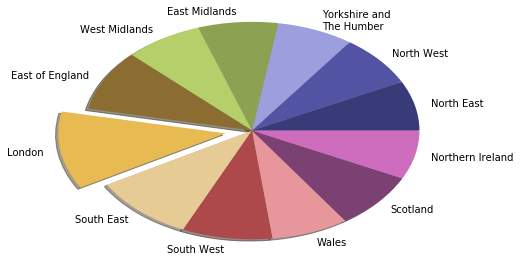

In [31]:
# plotting the pie chart
from matplotlib import cm
regional_gdhi = income[income.Area != 'United Kingdom']

cs=cm.tab20b(np.arange(12)/12.)
explode=(0,0,0,0,0,0,0.2,0,0,0,0,0) #pops out London, the largest bin.
plt.pie(regional_gdhi['Per head'], labels = regional_gdhi.Area, colors=cs, radius =1.25,shadow = True, explode=explode)

# showing the plot
plt.show()



Text(0,0.5,'GDHI in £')

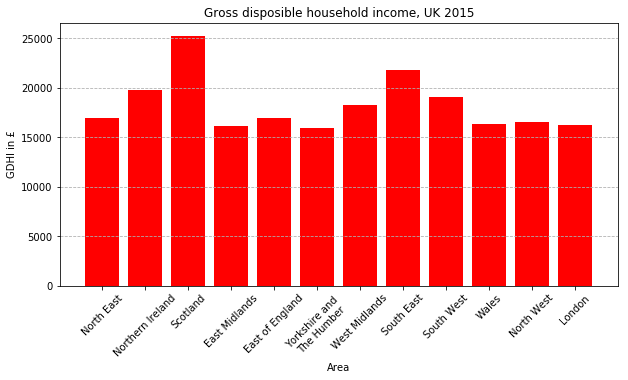

In [32]:
#gdhi_sorted = regional_gdhi.sort_values(by=['Per head'])

y = regional_gdhi['Per head']#.sort_values()
x = regional_gdhi['Area']#.sort_values()

plt.figure(figsize=(10,5))
plt.bar(x,y, color = 'red')
plt.grid(linestyle='--', which='major',axis='y')
plt.xticks(x,rotation=45)
plt.subplots_adjust(bottom=0.15)

plt.title("Gross disposible household income, UK 2015")
plt.xlabel('Area')
plt.ylabel("GDHI in £")

#***LABELS ARE NOT PLOTTING CORRECTLY

* plot a bar chart of the above data sorted biggest to smallest. LABELS ARE NOT CORRECT!!!

## 3.3. Does concentration of immigrants correlate with the voting pattern?
* correlation heatmap??


In [13]:
immigration

,Region,Nationality,Estimate
0,North East,UK,1584683
1,North East,EU,29085
2,North East,non-EU,38306
3,North East,Total,1652567
4,North West,UK,4180800
5,North West,EU,160196
6,North West,non-EU,150177
7,North West,Total,4494196
8,Yorkshire and the Humber,UK,3134210
9,Yorkshire and the Humber,EU,123013
